In [51]:
import os
import pandas as pd
import numpy as np
import preprocess_data as prep
from pandas.api.types import CategoricalDtype
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['font.size'] = 14

DATA_PATH = '../cell-profiler/measurements'
FILENAME = 'Nuclei.csv'

In [52]:
measurements = prep.cell_data(data_path=DATA_PATH, cytoplasm=False, biomarkers=False)

Total number of cells processed: 483.0

Check the numbers of cells correspond: True, False

The are no repeated column names: True
The are no repeated column names: True


In [53]:
measurements.head(3)

,label,image,object,combination,site,stiffness,well,area_cell,centerX_cell,centerY_cell,centerZ_cell,compactness_cell,eccentricity_cell,eulernumber_cell,extent_cell,formfactor_cell,majoraxislength_cell,maxferetdiameter_cell,maximumradius_cell,meanradius_cell,medianradius_cell,minferetdiameter_cell,minoraxislength_cell,orientation_cell,perimeter_cell,solidity_cell,children_cytoplasm_count_cell,integratedintensityedge_origwga_cell,integratedintensity_origwga_cell,lowerquartileintensity_origwga_cell,madintensity_origwga_cell,massdisplacement_origwga_cell,maxintensityedge_origwga_cell,maxintensity_origwga_cell,meanintensityedge_origwga_cell,meanintensity_origwga_cell,medianintensity_origwga_cell,minintensityedge_origwga_cell,minintensity_origwga_cell,stdintensityedge_origwga_cell,stdintensity_origwga_cell,upperquartileintensity_origwga_cell,loc_centermassintensityX_origwga_cell,loc_centermassintensityY_origwga_cell,loc_centermassintensityZ_origwga_cell,loc_centerX_cell,loc_centerY_cell,loc_centerZ_cell,loc_maxintensityX_origwga_cell,loc_maxintensityY_origwga_cell,loc_maxintensityZ_origwga_cell,anglebetweenneighbors_cell,firstclosestdistance_cell,firstclosestobjectnumber_cell,numberofneighbors_cell,percenttouching_cell,secondclosestdistance_cell,secondclosestobjectnumber_cell,number_object_number_cell,angularsecondmoment_origwga_00_cell,angularsecondmoment_origwga_01_cell,angularsecondmoment_origwga_02_cell,angularsecondmoment_origwga_03_cell,contrast_origwga_00_cell,contrast_origwga_01_cell,contrast_origwga_02_cell,contrast_origwga_03_cell,correlation_origwga_00_cell,correlation_origwga_01_cell,correlation_origwga_02_cell,correlation_origwga_03_cell,differenceentropy_origwga_00_cell,differenceentropy_origwga_01_cell,differenceentropy_origwga_02_cell,differenceentropy_origwga_03_cell,differencevariance_origwga_00_cell,differencevariance_origwga_01_cell,differencevariance_origwga_02_cell,differencevariance_origwga_03_cell,entropy_origwga_00_cell,entropy_origwga_01_cell,entropy_origwga_02_cell,entropy_origwga_03_cell,infomeas1_origwga_00_cell,infomeas1_origwga_01_cell,infomeas1_origwga_02_cell,infomeas1_origwga_03_cell,infomeas2_origwga_00_cell,infomeas2_origwga_01_cell,infomeas2_origwga_02_cell,infomeas2_origwga_03_cell,inversedifferencemoment_origwga_00_cell,inversedifferencemoment_origwga_01_cell,inversedifferencemoment_origwga_02_cell,inversedifferencemoment_origwga_03_cell,sumaverage_origwga_00_cell,sumaverage_origwga_01_cell,sumaverage_origwga_02_cell,sumaverage_origwga_03_cell,sumentropy_origwga_00_cell,sumentropy_origwga_01_cell,sumentropy_origwga_02_cell,sumentropy_origwga_03_cell,sumvariance_origwga_00_cell,sumvariance_origwga_01_cell,sumvariance_origwga_02_cell,sumvariance_origwga_03_cell,variance_origwga_00_cell,variance_origwga_01_cell,variance_origwga_02_cell,variance_origwga_03_cell,area_nucl,centerX_nucl,centerY_nucl,centerZ_nucl,compactness_nucl,eccentricity_nucl,eulernumber_nucl,extent_nucl,formfactor_nucl,majoraxislength_nucl,maxferetdiameter_nucl,maximumradius_nucl,meanradius_nucl,medianradius_nucl,minferetdiameter_nucl,minoraxislength_nucl,orientation_nucl,perimeter_nucl,solidity_nucl,children_cytoplasm_count_nucl,integratedintensityedge_origdapi,integratedintensityedge_origwga_nucl,integratedintensity_origdapi,integratedintensity_origwga_nucl,lowerquartileintensity_origdapi,lowerquartileintensity_origwga_nucl,madintensity_origdapi,madintensity_origwga_nucl,massdisplacement_origdapi,massdisplacement_origwga_nucl,maxintensityedge_origdapi,maxintensityedge_origwga_nucl,maxintensity_origdapi,maxintensity_origwga_nucl,meanintensityedge_origdapi,meanintensityedge_origwga_nucl,meanintensity_origdapi,meanintensity_origwga_nucl,medianintensity_origdapi,medianintensity_origwga_nucl,minintensityedge_origdapi,minintensityedge_origwga_nucl,minintensity_origdapi,minintensity_origwga_nucl,stdintensityedge_origdapi,stdintensityedge_origwga_nucl,stdintensity_origdapi,stdintensity_origwga_nucl,upperquartileintensity_origdapi,uppe

## Examine the data

In [54]:
measurements.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 483 entries, 0 to 482
Columns: 288 entries, label to variance_origwga_03_nucl
dtypes: category(1), float64(269), int64(12), object(6)
memory usage: 1.1+ MB


### Cells per stiffness value

In [55]:
measurements.groupby('stiffness')[['label']].count()

,label
stiffness,
0.2,82
2.0,163
16.0,97
32.0,55
64.0,86


### Cells per image (density)

In [56]:
cell_numbers = measurements.groupby(['stiffness', 'well', 'site'], as_index=False)[['object']].count()
cell_numbers.groupby('stiffness').mean()

,object
stiffness,
0.2,8.200000
2.0,11.642857
16.0,8.083333
32.0,6.111111
64.0,7.818182


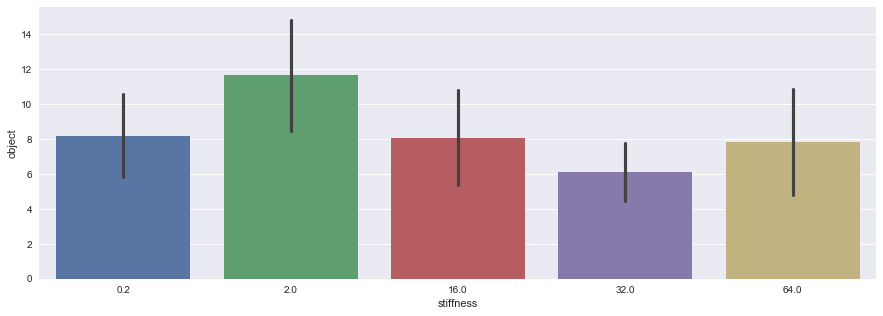

In [57]:
sns.barplot(x="stiffness", y="object", data=cell_numbers, ci='sd');

## Clean the data

### Missing values?

In [58]:
measurements.isnull().sum().sum()

0

### Descriptive statistics

In [59]:
stats = measurements.describe()

In [60]:
pd.options.display.max_columns = measurements.shape[1]
stats

,area_cell,centerX_cell,centerY_cell,centerZ_cell,compactness_cell,eccentricity_cell,eulernumber_cell,extent_cell,formfactor_cell,majoraxislength_cell,maxferetdiameter_cell,maximumradius_cell,meanradius_cell,medianradius_cell,minferetdiameter_cell,minoraxislength_cell,orientation_cell,perimeter_cell,solidity_cell,children_cytoplasm_count_cell,integratedintensityedge_origwga_cell,integratedintensity_origwga_cell,lowerquartileintensity_origwga_cell,madintensity_origwga_cell,massdisplacement_origwga_cell,maxintensityedge_origwga_cell,maxintensity_origwga_cell,meanintensityedge_origwga_cell,meanintensity_origwga_cell,medianintensity_origwga_cell,minintensityedge_origwga_cell,minintensity_origwga_cell,stdintensityedge_origwga_cell,stdintensity_origwga_cell,upperquartileintensity_origwga_cell,loc_centermassintensityX_origwga_cell,loc_centermassintensityY_origwga_cell,loc_centermassintensityZ_origwga_cell,loc_centerX_cell,loc_centerY_cell,loc_centerZ_cell,loc_maxintensityX_origwga_cell,loc_maxintensityY_origwga_cell,loc_maxintensityZ_origwga_cell,anglebetweenneighbors_cell,firstclosestdistance_cell,firstclosestobjectnumber_cell,numberofneighbors_cell,percenttouching_cell,secondclosestdistance_cell,secondclosestobjectnumber_cell,number_object_number_cell,angularsecondmoment_origwga_00_cell,angularsecondmoment_origwga_01_cell,angularsecondmoment_origwga_02_cell,angularsecondmoment_origwga_03_cell,contrast_origwga_00_cell,contrast_origwga_01_cell,contrast_origwga_02_cell,contrast_origwga_03_cell,correlation_origwga_00_cell,correlation_origwga_01_cell,correlation_origwga_02_cell,correlation_origwga_03_cell,differenceentropy_origwga_00_cell,differenceentropy_origwga_01_cell,differenceentropy_origwga_02_cell,differenceentropy_origwga_03_cell,differencevariance_origwga_00_cell,differencevariance_origwga_01_cell,differencevariance_origwga_02_cell,differencevariance_origwga_03_cell,entropy_origwga_00_cell,entropy_origwga_01_cell,entropy_origwga_02_cell,entropy_origwga_03_cell,infomeas1_origwga_00_cell,infomeas1_origwga_01_cell,infomeas1_origwga_02_cell,infomeas1_origwga_03_cell,infomeas2_origwga_00_cell,infomeas2_origwga_01_cell,infomeas2_origwga_02_cell,infomeas2_origwga_03_cell,inversedifferencemoment_origwga_00_cell,inversedifferencemoment_origwga_01_cell,inversedifferencemoment_origwga_02_cell,inversedifferencemoment_origwga_03_cell,sumaverage_origwga_00_cell,sumaverage_origwga_01_cell,sumaverage_origwga_02_cell,sumaverage_origwga_03_cell,sumentropy_origwga_00_cell,sumentropy_origwga_01_cell,sumentropy_origwga_02_cell,sumentropy_origwga_03_cell,sumvariance_origwga_00_cell,sumvariance_origwga_01_cell,sumvariance_origwga_02_cell,sumvariance_origwga_03_cell,variance_origwga_00_cell,variance_origwga_01_cell,variance_origwga_02_cell,variance_origwga_03_cell,area_nucl,centerX_nucl,centerY_nucl,centerZ_nucl,compactness_nucl,eccentricity_nucl,eulernumber_nucl,extent_nucl,formfactor_nucl,majoraxislength_nucl,maxferetdiameter_nucl,maximumradius_nucl,meanradius_nucl,medianradius_nucl,minferetdiameter_nucl,minoraxislength_nucl,orientation_nucl,perimeter_nucl,solidity_nucl,children_cytoplasm_count_nucl,integratedintensityedge_origdapi,integratedintensityedge_origwga_nucl,integratedintensity_origdapi,integratedintensity_origwga_nucl,lowerquartileintensity_origdapi,lowerquartileintensity_origwga_nucl,madintensity_origdapi,madintensity_origwga_nucl,massdisplacement_origdapi,massdisplacement_origwga_nucl,maxintensityedge_origdapi,maxintensityedge_origwga_nucl,maxintensity_origdapi,maxintensity_origwga_nucl,meanintensityedge_origdapi,meanintensityedge_origwga_nucl,meanintensity_origdapi,meanintensity_origwga_nucl,medianintensity_origdapi,medianintensity_origwga_nucl,minintensityedge_origdapi,minintensityedge_origwga_nucl,minintensity_origdapi,minintensity_origwga_nucl,stdintensityedge_origdapi,stdintensityedge_origwga_nucl,stdintensity_origdapi,stdintensity_origwga_nucl,upperquartileintensity_origdapi,upperquartileintensity_origwga_nucl,loc_centermassinten

In [61]:
measurements.describe(include=['object'])

,label,image,object,combination,site,well
count,483,483,483,483,483,483
unique,483,56,18,1,7,3
top,32.0-B-A3-2-3,11,1,B,4,A1
freq,1,18,56,483,109,210


### Drop features with zero variance

In [62]:
list(stats.columns[stats.loc['std', :] == 0])

['centerZ_cell',
 'eulernumber_cell',
 'children_cytoplasm_count_cell',
 'loc_centermassintensityZ_origwga_cell',
 'loc_centerZ_cell',
 'loc_maxintensityZ_origwga_cell',
 'centerZ_nucl',
 'eulernumber_nucl',
 'loc_centermassintensityZ_origdapi',
 'loc_centermassintensityZ_origwga_nucl',
 'loc_centerZ_nucl',
 'loc_maxintensityZ_origdapi',
 'loc_maxintensityZ_origwga_nucl']

In [63]:
measurements.drop(stats.columns[stats.loc['std', :] == 0], axis=1, inplace=True)

### Drop duplicates

In [67]:
dupl_cols = ['number_object_number_cell', 'number_object_number_nucl']
[measurements.drop([col], axis=1, inplace=True) for col in dupl_cols if sum(measurements.object.astype(int) != measurements[col])==0]

[None, None]

In [68]:
print("The dataset after cleaning has {} rows and {} columns.".format(measurements.shape[0], measurements.shape[1]))
measurements.dtypes.value_counts()

The dataset after cleaning has 483 rows and 273 columns.


float64     259
int64         7
object        6
category      1
dtype: int64

In [ ]:
centre_cols = ['centerX_cell', 'loc_centerX_cell']
print("Centre coordinates")
print(measurements[centre_cols].head(3), '\n')

print("Intensity-weighted centroid")
print(measurements['loc_centermassintensityX_wga_cell'].head(3), '\n')

print("Mass displacement")
print(measurements['massdisplacement_wga_cell'].head(10))

(abs(measurements['loc_centermassintensityX_wga_cell'] - measurements['loc_centerX_cell'])).head(10)

## Feature selection

### Define feature columns

In [69]:
# Dataset with reduced number of features
measurements_ = measurements.copy()
measurements_['stiffness_num'] = pd.to_numeric(measurements_.stiffness)

In [70]:
numeric_cols = measurements_.select_dtypes(include=[np.number]).columns
feature_cols = measurements_.select_dtypes(include=[np.number]).drop(['stiffness_num'], axis=1).columns

Plate-layout-effect and batch-effect corrections

> To add heat maps of the correlations between all of wells within an experiment.

### Correlations between replicates

In [ ]:
measurements_.groupby(['stiffness_num', 'well']).sum()

> Calculate the correlations between replicates.

### Correlation with stiffness

In [71]:
correlations = measurements_.corr();
correlations.head(5)

,area_cell,centerX_cell,centerY_cell,compactness_cell,eccentricity_cell,extent_cell,formfactor_cell,majoraxislength_cell,maxferetdiameter_cell,maximumradius_cell,meanradius_cell,medianradius_cell,minferetdiameter_cell,minoraxislength_cell,orientation_cell,perimeter_cell,solidity_cell,integratedintensityedge_origwga_cell,integratedintensity_origwga_cell,lowerquartileintensity_origwga_cell,madintensity_origwga_cell,massdisplacement_origwga_cell,maxintensityedge_origwga_cell,maxintensity_origwga_cell,meanintensityedge_origwga_cell,meanintensity_origwga_cell,medianintensity_origwga_cell,minintensityedge_origwga_cell,minintensity_origwga_cell,stdintensityedge_origwga_cell,stdintensity_origwga_cell,upperquartileintensity_origwga_cell,loc_centermassintensityX_origwga_cell,loc_centermassintensityY_origwga_cell,loc_centerX_cell,loc_centerY_cell,loc_maxintensityX_origwga_cell,loc_maxintensityY_origwga_cell,anglebetweenneighbors_cell,firstclosestdistance_cell,firstclosestobjectnumber_cell,numberofneighbors_cell,percenttouching_cell,secondclosestdistance_cell,secondclosestobjectnumber_cell,angularsecondmoment_origwga_00_cell,angularsecondmoment_origwga_01_cell,angularsecondmoment_origwga_02_cell,angularsecondmoment_origwga_03_cell,contrast_origwga_00_cell,contrast_origwga_01_cell,contrast_origwga_02_cell,contrast_origwga_03_cell,correlation_origwga_00_cell,correlation_origwga_01_cell,correlation_origwga_02_cell,correlation_origwga_03_cell,differenceentropy_origwga_00_cell,differenceentropy_origwga_01_cell,differenceentropy_origwga_02_cell,differenceentropy_origwga_03_cell,differencevariance_origwga_00_cell,differencevariance_origwga_01_cell,differencevariance_origwga_02_cell,differencevariance_origwga_03_cell,entropy_origwga_00_cell,entropy_origwga_01_cell,entropy_origwga_02_cell,entropy_origwga_03_cell,infomeas1_origwga_00_cell,infomeas1_origwga_01_cell,infomeas1_origwga_02_cell,infomeas1_origwga_03_cell,infomeas2_origwga_00_cell,infomeas2_origwga_01_cell,infomeas2_origwga_02_cell,infomeas2_origwga_03_cell,inversedifferencemoment_origwga_00_cell,inversedifferencemoment_origwga_01_cell,inversedifferencemoment_origwga_02_cell,inversedifferencemoment_origwga_03_cell,sumaverage_origwga_00_cell,sumaverage_origwga_01_cell,sumaverage_origwga_02_cell,sumaverage_origwga_03_cell,sumentropy_origwga_00_cell,sumentropy_origwga_01_cell,sumentropy_origwga_02_cell,sumentropy_origwga_03_cell,sumvariance_origwga_00_cell,sumvariance_origwga_01_cell,sumvariance_origwga_02_cell,sumvariance_origwga_03_cell,variance_origwga_00_cell,variance_origwga_01_cell,variance_origwga_02_cell,variance_origwga_03_cell,area_nucl,centerX_nucl,centerY_nucl,compactness_nucl,eccentricity_nucl,extent_nucl,formfactor_nucl,majoraxislength_nucl,maxferetdiameter_nucl,maximumradius_nucl,meanradius_nucl,medianradius_nucl,minferetdiameter_nucl,minoraxislength_nucl,orientation_nucl,perimeter_nucl,solidity_nucl,children_cytoplasm_count_nucl,integratedintensityedge_origdapi,integratedintensityedge_origwga_nucl,integratedintensity_origdapi,integratedintensity_origwga_nucl,lowerquartileintensity_origdapi,lowerquartileintensity_origwga_nucl,madintensity_origdapi,madintensity_origwga_nucl,massdisplacement_origdapi,massdisplacement_origwga_nucl,maxintensityedge_origdapi,maxintensityedge_origwga_nucl,maxintensity_origdapi,maxintensity_origwga_nucl,meanintensityedge_origdapi,meanintensityedge_origwga_nucl,meanintensity_origdapi,meanintensity_origwga_nucl,medianintensity_origdapi,medianintensity_origwga_nucl,minintensityedge_origdapi,minintensityedge_origwga_nucl,minintensity_origdapi,minintensity_origwga_nucl,stdintensityedge_origdapi,stdintensityedge_origwga_nucl,stdintensity_origdapi,stdintensity_origwga_nucl,upperquartileintensity_origdapi,upperquartileintensity_origwga_nucl,loc_centermassintensityX_origdapi,loc_centermassintensityX_origwga_nucl,loc_centermassintensityY_origdapi,loc_centermassintensityY_origwga_nucl,loc_centerX_nucl,loc_centerY_nucl,loc_maxintensityX_origdapi,loc_maxintensity

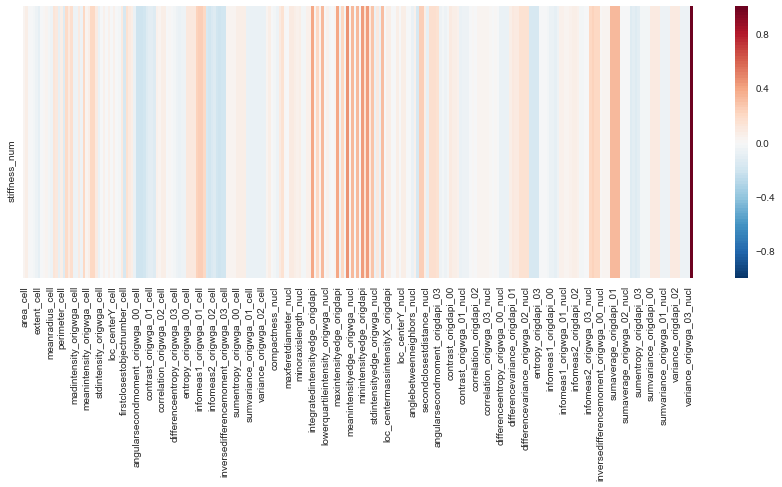

In [72]:
sns.heatmap(correlations[['stiffness_num']].T, cmap=sns.color_palette("RdBu_r", 100), vmin=-1, vmax=1);

### Explore groups of features

###### Cell shape

In [ ]:
group = pd.concat([measurements.loc[:, 'eulernumber_cell' : 'maxferetdiameter_cell'], measurements_.stiffness_num], axis=1) 
print(group.shape)

In [ ]:
group['log_majoraxislength_cell'] = np.log(group['majoraxislength_cell'])
#group['log_eccentricity_cell'] = np.log(group['eccentricity_cell'])
group['majoraxislength_cell'].hist();

In [ ]:
sns.pairplot(group, height=3);

### Correlation between features

In [ ]:
sns.set(rc={'figure.figsize':(15, 12)})
sns.heatmap(correlations, cmap=sns.color_palette("RdBu_r", 100), vmin=-1, vmax=1);

###### Regress `medianintensity_wga_cell` on `area_cell` and `meanintensity_wga_cell`

In [ ]:
initial_set = ['area_cell', 'meanintensity_wga_cell']
Xk = np.array(measurements[initial_set])
x = np.array(measurements.medianintensity_wga_cell)
Xk.shape, x.shape

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

lin_reg.fit(Xk, x)
print(lin_reg.intercept_, lin_reg.coef_)
x_hat = lin_reg.predict(Xk)
u = x - x_hat

In [ ]:
print(correlations.loc['area_cell', 'medianintensity_wga_cell'])
plt.plot(Xk[:, 0], label='Initial set: Area cell');
plt.plot(x, label='New feature: Median intensity');
plt.legend();

In [ ]:
print(correlations.loc['meanintensity_wga_cell', 'medianintensity_wga_cell'])
plt.plot(Xk[:, 1], label='Initial set: Mean intensity');
plt.plot(x, label='New feature: Median intensity');
#plt.plot(x_hat, label='Prediction');
#plt.plot(u, label='Residual');
plt.legend();

In [ ]:
plt.plot(x, label='New feature: Median intensity');
plt.plot(x_hat, label='Prediction');
plt.plot(u, label='Residual');
plt.legend();

###### Create an artificial response variable and compare $R^2$

In [ ]:
def step_wise_regression(X):
    from sklearn.linear_model import LinearRegression
    
    y = X.sum(axis=1)
    print(X.shape, y.shape)

    lin_reg = LinearRegression()
    r2 = []
    for k in range(1,X.shape[1]):
        lin_reg.fit(X.iloc[:, 0:k], y)
        r2.append(lin_reg.score(X.iloc[:, 0:k], y))

    plt.plot(r2);

In [ ]:
step_wise_regression(measurements[feature_cols])

###### Delete columns that are highly correlated with others

In [ ]:
def select_low_corr(X, y):
    corr = X.corr();
    cols = np.full((corr.shape[0],), True, dtype=bool)
    
    for i in range(corr.shape[0]):
        for j in range(i+1, corr.shape[0]):
            if abs(corr.iloc[i,j]) >= 0.9:
                if cols[j]:
                    cols[j] = False
    selected_cols = X.columns[cols]
    return selected_cols

In [ ]:
selected_cols = select_low_corr(measurements_[feature_cols], measurements_.stiffness)
[measurements_.drop([col], axis=1, inplace=True) for col in feature_cols if col not in selected_cols]

In [ ]:
print("After feature selection the dataset has {} rows and {} columns.".format(measurements_.shape[0], 
                                                                               measurements_.shape[1]))
print(measurements_.dtypes.value_counts())
measurements_.head()

In [ ]:
# Redefine numeric columns and feature columns
numeric_cols = measurements_.select_dtypes(include=[np.number]).columns
feature_cols = measurements_.select_dtypes(include=[np.number]).drop(['stiffness_num'], axis=1).columns

## Normalisation

In [ ]:
measurements_norm = measurements_.copy()
# Standardise the entire dataset
measurements_norm[feature_cols] = (measurements_norm[feature_cols] - measurements_norm[feature_cols].mean()) / measurements_norm[feature_cols].std()
measurements_norm.head(3)

### Visualise all the features

In [ ]:
sns.set(rc={'figure.figsize':(15, 12)})

sns.heatmap(measurements_norm[feature_cols],
            vmin = -2, vmax = 2,
            cmap=sns.color_palette("RdBu_r", 100),
            cbar_kws={"aspect": 20},
            xticklabels=False, yticklabels=False);

plt.savefig('../results/Feature heatmap.png', bbox_inches='tight', dpi=300);

### Visualise aggregated values

In [ ]:
sns.set(rc={'figure.figsize':(15, 3)})

mean_per_stiffness = measurements_norm.groupby('stiffness')[feature_cols].mean()

sns.heatmap(mean_per_stiffness, 
            vmin = -1, vmax = 1,
            cmap=sns.color_palette("PRGn", 100), 
            cbar_kws={"aspect": 5},
            xticklabels=False, yticklabels=True);

plt.savefig('../results/Aggregated heatmap.png', bbox_inches='tight', dpi=300);

In [ ]:
list(mean_per_stiffness.columns[mean_per_stiffness.loc['64.0',:] > 0.5])

In [ ]:
# Too many features, do not run this!
# sns.pairplot(nuclei_norm, height=3, x_vars=["stiffness"], y_vars=nuclei_norm.columns);

## Clustering

> `sns.clustermap(metric="correlation")` doesn't work. Will getting rid of redundant features help?

In [ ]:
sns.clustermap(measurements_norm[feature_cols], 
               metric='euclidean', method='ward', 
               col_cluster=False,
               cmap=sns.color_palette('RdBu_r', 100), robust=True);

In [ ]:
#sns.color_palette("Paired", len(stiffness_levels))
# Prepare a vector of colours mapped to the 'stiffness' column
my_palette = dict(zip(measurements_norm.stiffness.unique(), sns.color_palette("Set3", 4)))
row_colors = measurements_norm.stiffness.map(my_palette)

sns.clustermap(measurements_norm[feature_cols], 
               metric='euclidean', method='ward', 
               col_cluster=False,
               cmap=sns.color_palette('RdBu_r', 100), robust=True, 
               row_colors=row_colors);

#plt.savefig('../results/Clustering.png', bbox_inches='tight', dpi=300);

In [ ]:
print(my_palette.keys())
sns.palplot(my_palette.values())

## PCA

In [ ]:
from sklearn.preprocessing import StandardScaler

# Separating out the features
X = measurements_.loc[:, feature_cols].values

# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled.shape

In [ ]:
from sklearn.decomposition import PCA

n_components = 50
# Create a PCA object
pca = PCA(n_components=n_components)

# Apply PCA to the scaled feature matrix
principal_components = pca.fit_transform(X_scaled)

pc_cols = [('pc_' + str(i)) for i in range(1, n_components + 1)]
pc_df = pd.concat([measurements_.loc[:, 'label' : 'well'],
                  pd.DataFrame(data = principal_components, columns = pc_cols)], 
                  axis=1)

pc_df.shape

In [ ]:
plt.rcParams['figure.figsize'] = (12, 5)

plt.plot(X_scaled[0]);

In [ ]:
print(pca.explained_variance_.shape)
print("Percentage of explained variance:\n", 100 - pca.explained_variance_)
n_pc = sum(100 - pca.explained_variance_ < 98.0) + 1
print("\nThe first {} principal components explain {} variance".
      format(n_pc, 100 - pca.explained_variance_[n_pc-1]))

In [ ]:
plt.plot(pca.explained_variance_);

#plt.savefig('../results/Explained variance.png', bbox_inches='tight', dpi=300);

In [ ]:
pc_df[pc_cols].T.plot(legend=False);

#plt.savefig('../results/Principal components.png', bbox_inches='tight', dpi=300);

In [ ]:
plt.plot(pca.components_[0]);

In [ ]:
first_component = zip(measurements_.columns, pca.components_[0])

for col, weight in first_component:
    if (weight >0.15) or (weight < -0.20):
        print(col, weight)

In [ ]:
my_palette = dict(zip(pc_df.stiffness.unique(), sns.color_palette("Set3", 4)))
row_colors = pc_df.stiffness.map(my_palette)

sns.clustermap(pc_df.loc[:,'pc_1' : 'pc_20'], 
               metric='euclidean', method='ward', 
               col_cluster=False,
               cmap=sns.color_palette('RdBu_r', 40), robust=True, 
               row_colors=row_colors);

plt.savefig('../results/PCA Clustering 50.png', bbox_inches='tight', dpi=300);

In [ ]:
print(my_palette.keys())
sns.palplot(my_palette.values())

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = measurements_[feature_cols]
y = measurements_.stiffness
 
X.shape, y.shape

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
X_train.shape, X_test.shape

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
rfc = RandomForestClassifier()
rfc.fit(X_train_scaled, y_train)
y_pred = rfc.predict(X_test_scaled)

In [ ]:
feature_importance = zip(measurements_.columns, rfc.feature_importances_)

for col, weight in feature_importance:
    if (weight > 0.015):
        print(col, weight)

## Biomarkers

### Load and parse the data

In [ ]:
biomarkers = load_data(filename='Biomarkers_Cells.csv')
biomarkers.head()

In [ ]:
clean_metadata(biomarkers)
biomarkers.head(3)

In [ ]:
biomarkers = move_column(biomarkers, 'label')
biomarkers.head(3)

In [ ]:
print(biomarkers.shape)
list(biomarkers.columns)

In [ ]:
drop_cols = ['Location_Center_X', 'Location_Center_Y', 'Location_Center_Z',
             'Number_Object_Number', 'Parent_Nuclei']
biomarkers.drop(drop_cols, axis=1, inplace=True)

### Missing values?

In [ ]:
# Are there any missing values?
print(biomarkers.isnull().sum().sum())

### Descriptive statistics

In [ ]:
stats = biomarkers.describe()
stats

### Drop the features with zero variance

In [ ]:
biomarkers.drop(stats.columns[stats.loc['std', :] == 0], axis=1, inplace=True)

In [ ]:
print("New shape is: {}".format(biomarkers.shape))
biomarkers.dtypes.value_counts()

### Create dataframes for Keratin and Vimentin

In [ ]:
ker_cols = [col for col in biomarkers.columns if 'OrigKer' in col]
print(len(ker_cols))

In [ ]:
vim_cols = [col for col in biomarkers.columns if 'OrigVim' in col]
print(len(vim_cols))

In [ ]:
keratin = biomarkers.copy()
keratin.drop(vim_cols, axis=1, inplace=True)

print(keratin.shape)
keratin.head(3)

In [ ]:
vimentin = biomarkers.copy()
vimentin.drop(ker_cols, axis=1, inplace=True)

print(vimentin.shape)
vimentin.head(3)

### Correlations between features

#### Keratin

In [ ]:
keratin_ = keratin.copy()
keratin_['stiffness_num'] = pd.to_numeric(keratin_.stiffness)

In [ ]:
correlations = keratin_.corr();
correlations.stiffness_num

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.heatmap(correlations, cmap=sns.color_palette("PRGn_r", 100), vmin=-1, vmax=1);

plt.savefig('../results/Keratin Correlations.png', bbox_inches='tight', dpi=300);

#### Vimentin

In [ ]:
vimentin_ = vimentin.copy()
vimentin_['stiffness_num'] = pd.to_numeric(vimentin_.stiffness)

In [ ]:
correlations = vimentin_.corr();
correlations.stiffness_num

In [ ]:
plt.rcParams['figure.figsize'] = (12, 10)

sns.heatmap(correlations, cmap=sns.color_palette("PRGn_r", 100), vmin=-1, vmax=1);

plt.savefig('../results/Vimentin Correlations.png', bbox_inches='tight', dpi=300);

### Intensity by stiffness

#### Keratin

In [ ]:
keratin['total_px'] = keratin['Intensity_IntegratedIntensity_OrigKer'] / keratin['Intensity_MeanIntensity_OrigKer']
keratin['edge_px'] = keratin['Intensity_IntegratedIntensityEdge_OrigKer'] / keratin['Intensity_MeanIntensityEdge_OrigKer']

In [ ]:
keratin.head(3)

In [ ]:
keratin['IntegratedIntensityInner'] = keratin['Intensity_IntegratedIntensity_OrigKer'] - keratin['Intensity_IntegratedIntensityEdge_OrigKer']

keratin['MeanIntensityInner'] = keratin['IntegratedIntensityInner'] / (keratin['total_px'] - keratin['edge_px'])

In [ ]:
intensity_cols = ['Intensity_IntegratedIntensity_OrigKer', 
                  'IntegratedIntensityInner', 
                  'Intensity_IntegratedIntensityEdge_OrigKer']

fig, ax = plt.subplots()
keratin.groupby('stiffness')[intensity_cols].mean().plot(kind='bar', 
                                                         title="Integrated intensity of Cytokeratin", 
                                                         fontsize=14,
                                                         ax=ax);
ax.legend(["Integrated Intensity", "Integrated Inner Intensity", "Integrated Edge Intensity"], fontsize=14);

In [ ]:
intensity_cols = ['Intensity_MeanIntensity_OrigKer', 
                  'MeanIntensityInner', 
                  'Intensity_MeanIntensityEdge_OrigKer']

fig, ax = plt.subplots()
keratin.groupby('stiffness')[intensity_cols].mean().plot(kind='bar', 
                                                         title="Mean intensity of Cytokeratin", 
                                                         fontsize=14,
                                                         ax=ax);
ax.legend(["Mean Intensity", "Mean Inner Intensity", "Mean Edge Intensity"], fontsize=14);

plt.savefig('../results/Cytokeratin Mean Intensity.png', bbox_inches='tight', dpi=300);

#### Vimentin

In [ ]:
vimentin['total_px'] = vimentin['Intensity_IntegratedIntensity_OrigVim'] / vimentin['Intensity_MeanIntensity_OrigVim']
vimentin['edge_px'] = vimentin['Intensity_IntegratedIntensityEdge_OrigVim'] / vimentin['Intensity_MeanIntensityEdge_OrigVim']

In [ ]:
vimentin.head(3)

In [ ]:
vimentin['IntegratedIntensityInner'] = vimentin['Intensity_IntegratedIntensity_OrigVim'] - vimentin['Intensity_IntegratedIntensityEdge_OrigVim']

vimentin['MeanIntensityInner'] = vimentin['IntegratedIntensityInner'] / (vimentin['total_px'] - vimentin['edge_px'])

In [ ]:
intensity_cols = ['Intensity_IntegratedIntensity_OrigVim', 
                  'IntegratedIntensityInner', 
                  'Intensity_IntegratedIntensityEdge_OrigVim']

fig, ax = plt.subplots()
vimentin.groupby('stiffness')[intensity_cols].mean().plot(kind='bar', 
                                                         title="Integrated intensity of Vimentin", 
                                                         fontsize=14,
                                                         ax=ax);
ax.legend(["Integrated Intensity", "Integrated Inner Intensity", "Integrated Edge Intensity"], fontsize=14);

In [ ]:
intensity_cols = ['Intensity_MeanIntensity_OrigVim', 
                  'MeanIntensityInner', 
                  'Intensity_MeanIntensityEdge_OrigVim']

fig, ax = plt.subplots()
vimentin.groupby('stiffness')[intensity_cols].mean().plot(kind='bar', 
                                                         title="Mean intensity of Vimentin", 
                                                         fontsize=14,
                                                         ax=ax);
ax.legend(["Mean Intensity", "Mean Inner Intensity", "Mean Edge Intensity"], fontsize=14);

plt.savefig('../results/Vimentin Mean Intensity.png', bbox_inches='tight', dpi=300);

### Normalise signal and compare

In [ ]:
max_ker = keratin[['Intensity_MeanIntensity_OrigKer']].max()
max_ker

In [ ]:
keratin[['Intensity_MeanIntensity_OrigKer']].head()